# EE6310 - Image and Video Processing, HW3


## 1. 2D-DFT


### Imports and basic setup


(<Figure size 2160x720 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

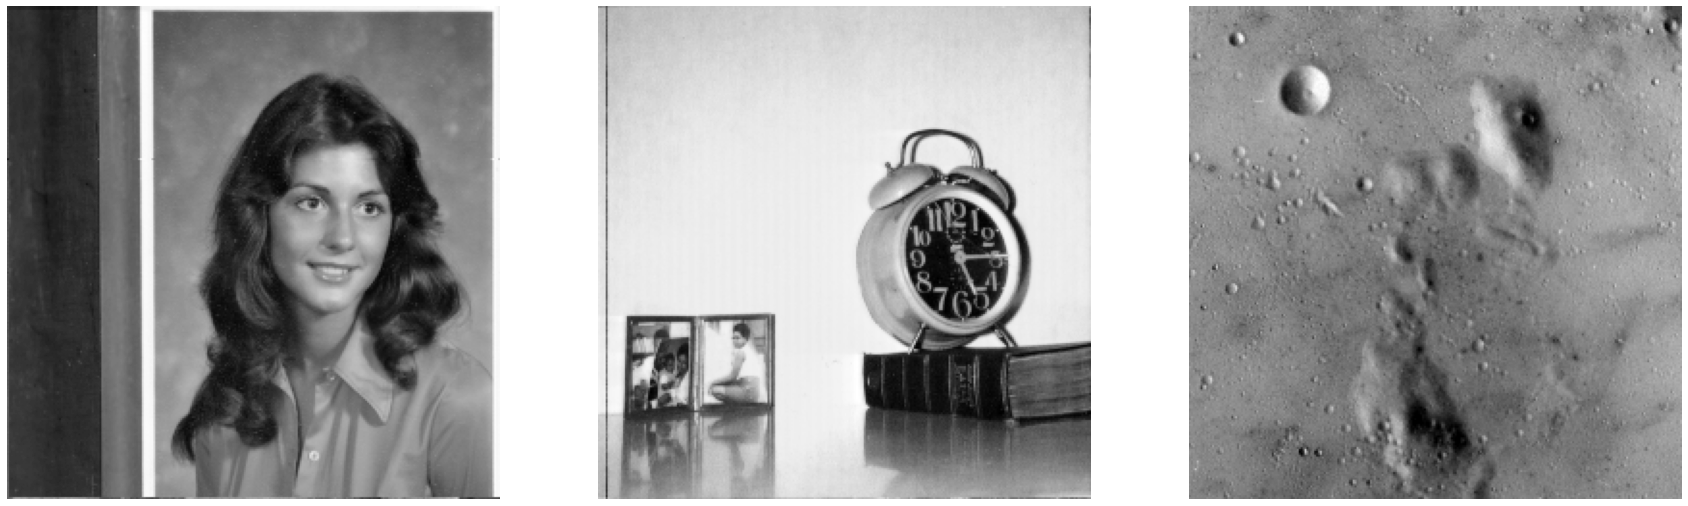

In [194]:
from matplotlib import pyplot as plt, image as mpimg
import numpy as np
from copy import deepcopy
import math
from PIL import Image


def color_to_gray(img: np.ndarray) -> np.ndarray:
    """
    Converts an RGB image to grayscale.
    """
    return np.dot(img[..., :3], [1 / 3, 1 / 3, 1 / 3])


def resize_image(img: np.ndarray, new_size: tuple[int, int]) -> np.ndarray:
    """
    Resizes an image to a new size.
    """
    return np.array(Image.fromarray(img).resize(new_size))


Female = resize_image(color_to_gray(mpimg.imread("Female.tiff")), (32, 32))
Female_Full = color_to_gray(mpimg.imread("Female.tiff"))
Clock = resize_image(mpimg.imread("Clock.tiff"), (32, 32))
Clock_Full = mpimg.imread("Clock.tiff")
Moon = resize_image(mpimg.imread("Moon.tiff"), (32, 32))
Moon_Full = mpimg.imread("Moon.tiff")


def printImages(imgs: list[np.ndarray], figsize=(10, 5)) -> tuple[plt.Figure, plt.Axes]:
    f, axarr = plt.subplots(1, len(imgs), figsize=figsize)
    for i in range(len(imgs)):
        axarr[i].imshow(imgs[i], cmap="gray")
        axarr[i].axis("off")
    return f, axarr


images = [Female, Clock, Moon]
images_full = [Female_Full, Clock_Full, Moon_Full]

printImages(
    images_full,
    (30, 10),
)


### 1.1 DFT as a summation over two dimensions


In [195]:
def DFT(x: np.ndarray) -> np.ndarray:
    X = np.zeros(x.shape, dtype=complex)
    for u in range(x.shape[0]):
        for v in range(x.shape[1]):
            for i in range(x.shape[0]):
                for j in range(x.shape[1]):
                    X[u, v] += x[i, j] * np.exp(
                        -1j * 2 * np.pi * (u * i / x.shape[0] + v * j / x.shape[1])
                    )
    return X


def IDFT(X: np.ndarray) -> np.ndarray:
    x = np.zeros(X.shape, dtype=complex)
    for u in range(X.shape[0]):
        for v in range(X.shape[1]):
            for i in range(X.shape[0]):
                for j in range(X.shape[1]):
                    x[u, v] += X[i, j] * np.exp(
                        1j * 2 * np.pi * (u * i / X.shape[0] + v * j / X.shape[1])
                    )
    return x / (X.shape[0] * X.shape[1])


### 1.2 DFT using complex exponential matrix


In [196]:
def DFT_complex(x: np.ndarray) -> np.ndarray:
    M, N = x.shape
    n = np.asmatrix(np.arange(N))
    m = np.asmatrix(np.arange(M))
    dft_M = np.exp((-2j * np.pi / M) * m.T * m)
    dft_N = np.exp((-2j * np.pi / N) * n.T * n)
    return np.asarray(dft_M * x * dft_N)


def IDFT_complex(X: np.ndarray) -> np.ndarray:
    M, N = X.shape
    n = np.asmatrix(np.arange(N))
    m = np.asmatrix(np.arange(M))
    idft_M = np.exp((2j * np.pi / M) * m.T * m)
    idft_N = np.exp((2j * np.pi / N) * n.T * n)
    return np.asarray(idft_M * X * idft_N)


### 1.1 Display the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transformation


In [197]:
def pointOperation(img: np.ndarray, P: float = 1, L: int = 0):
    r = deepcopy(img)
    for (i, row) in enumerate(img):
        for (j, _) in enumerate(row):
            new_pixel = int(P * img[i][j]) + L
            if new_pixel < 0:
                new_pixel = 0
            if new_pixel > 255:
                new_pixel = 255
            r[i][j] = new_pixel
    return r


def findMinMaxAndK(img: np.ndarray) -> tuple[int, int, int]:
    maxVal = img[0][0]
    minVal = img[0][0]
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            if pixel > maxVal:
                maxVal = pixel
            if pixel < minVal:
                minVal = pixel
    return minVal, maxVal, 256


def FSCS(img: np.ndarray) -> np.ndarray:
    A, B, K = findMinMaxAndK(img)
    P: float = float(K - 1) / float(B - A)
    L = -1 * A * P
    return pointOperation(img, P=P, L=L)


- 1.1.1 Display the image

(<Figure size 2160x720 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

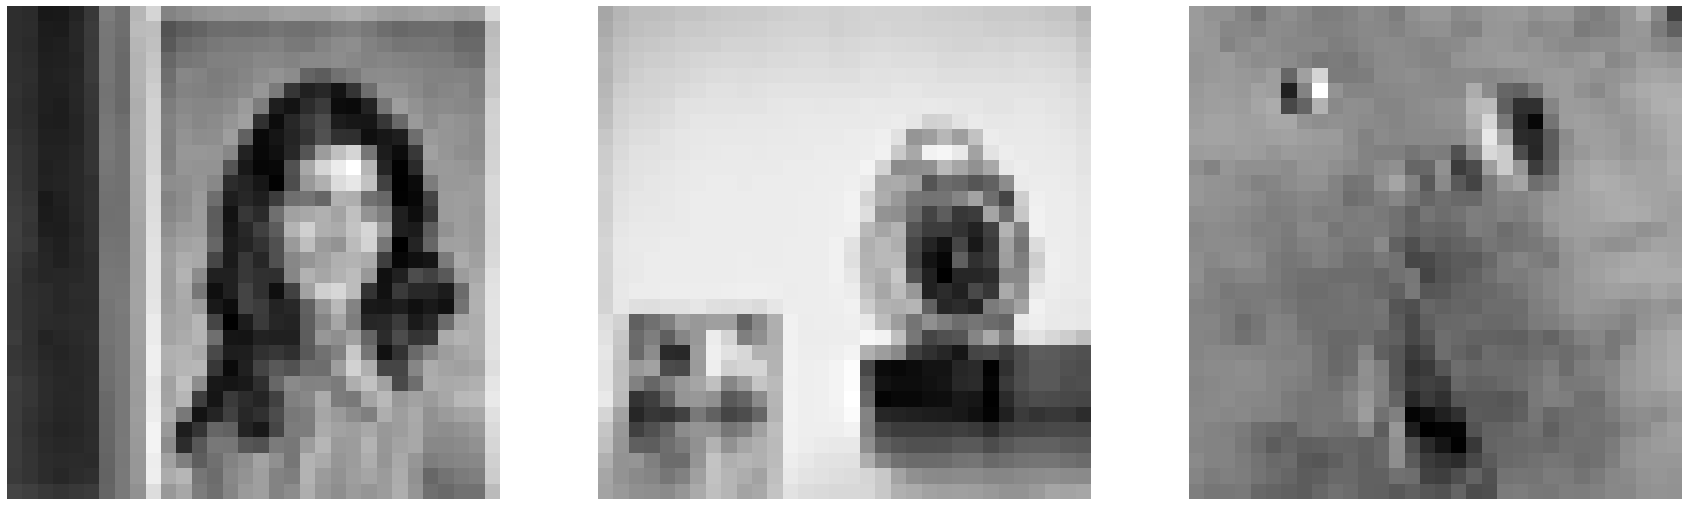

In [198]:
printImages(
    images,
    (30, 10),
)


- 1.1.2 Display the DFT magnitude


(<Figure size 2160x720 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

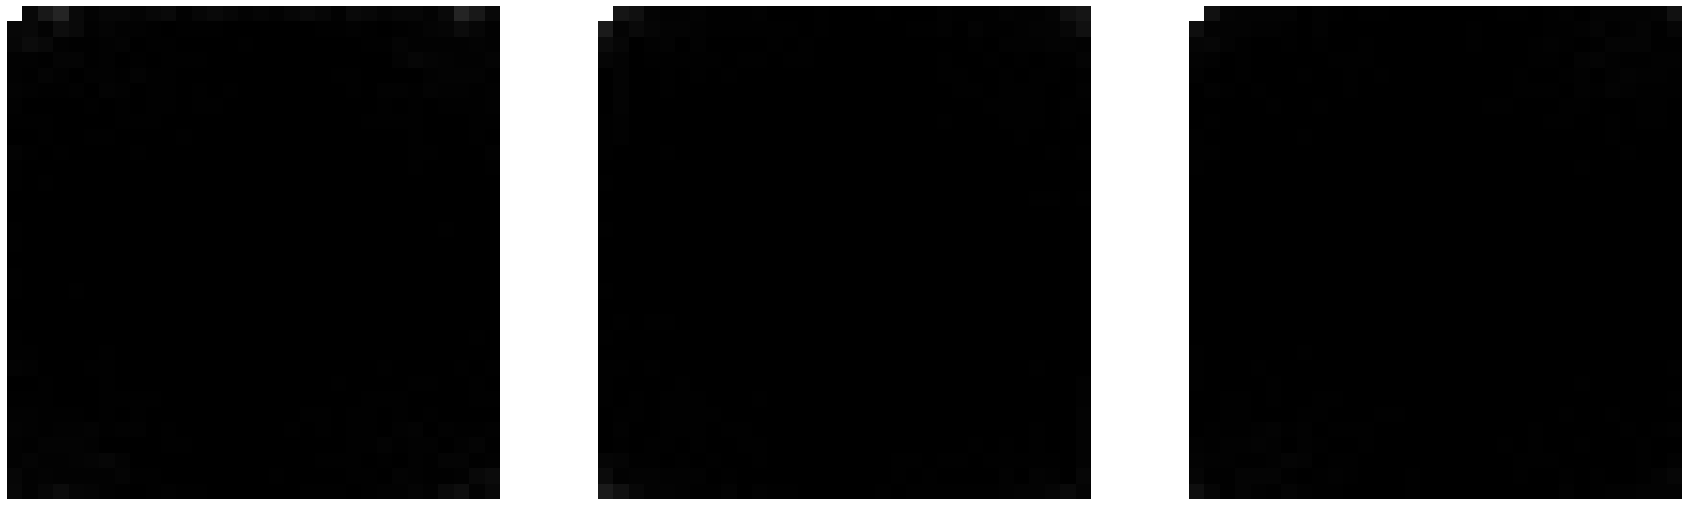

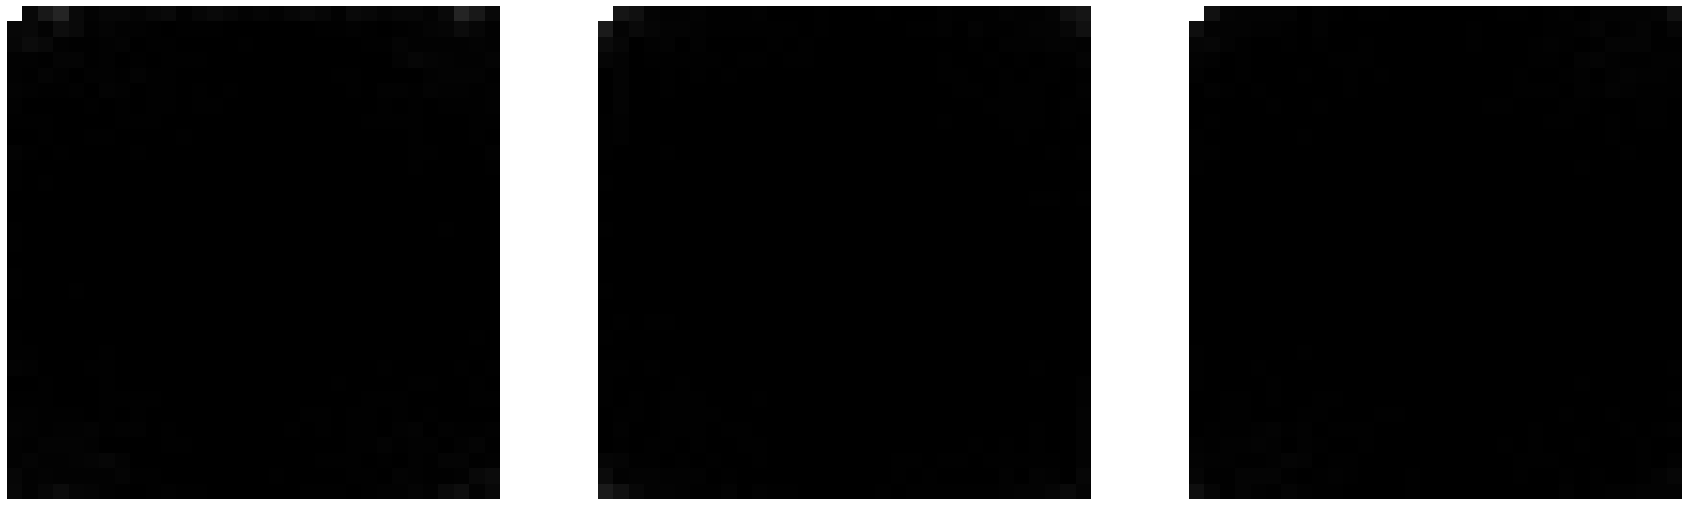

In [199]:
DFT_magnitude = map(lambda img: np.absolute(DFT(img)), images)
DFT_complex_magnitude = map(lambda img: np.absolute(DFT_complex(img)), images)

printImages(
    list(DFT_magnitude),
    (30, 10),
)
printImages(
    list(DFT_complex_magnitude),
    (30, 10),
)


- 1.1.3 Display the phase


(<Figure size 2160x720 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

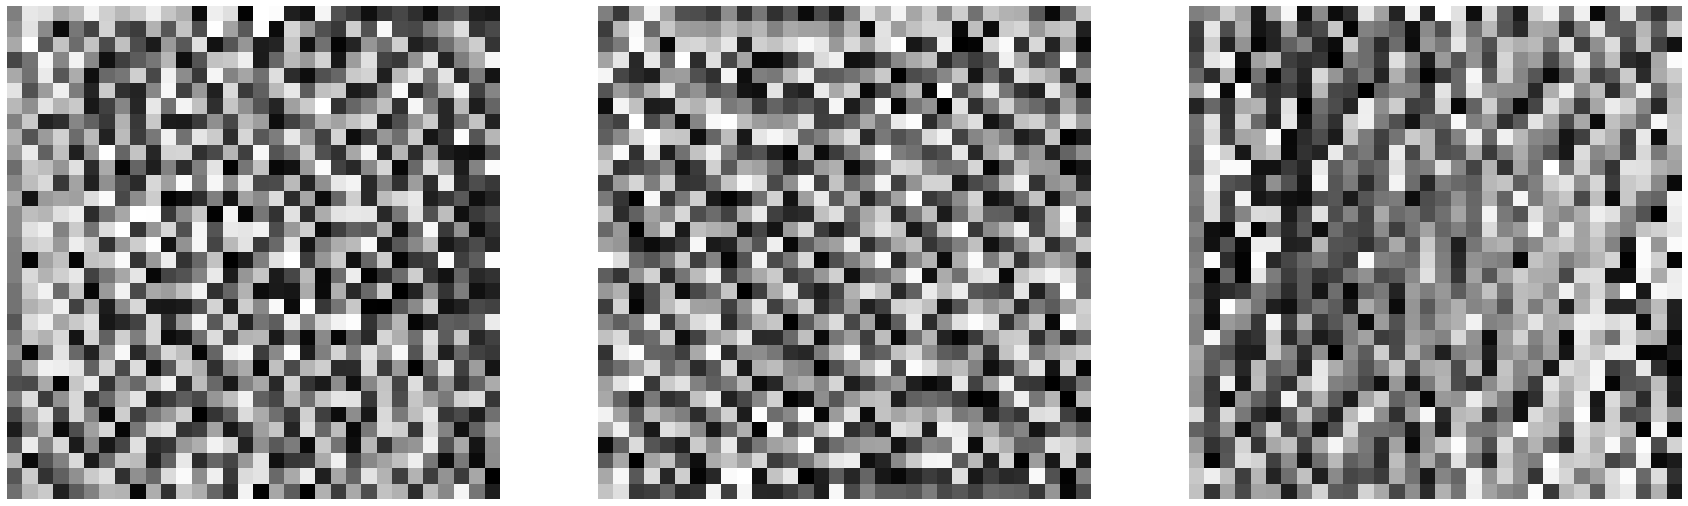

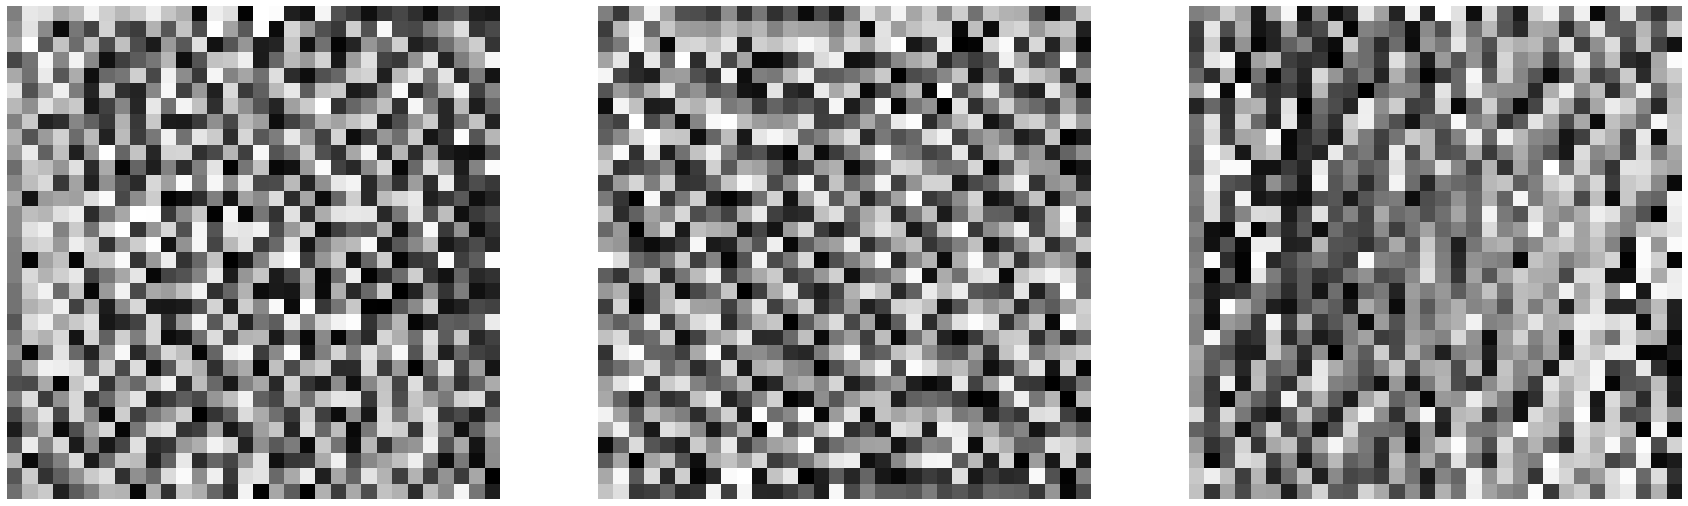

In [200]:
DFT_phase = map(lambda img: np.angle(DFT(img)), images)
DFT_complex_phase = map(lambda img: np.angle(DFT_complex(img)), images)

printImages(
    list(DFT_phase),
    (30, 10),
)
printImages(
    list(DFT_complex_phase),
    (30, 10),
)


- 1.1.4 Display the DFT magnitude subject to the logarithmic transformation


Log Transformation


(<Figure size 2160x720 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

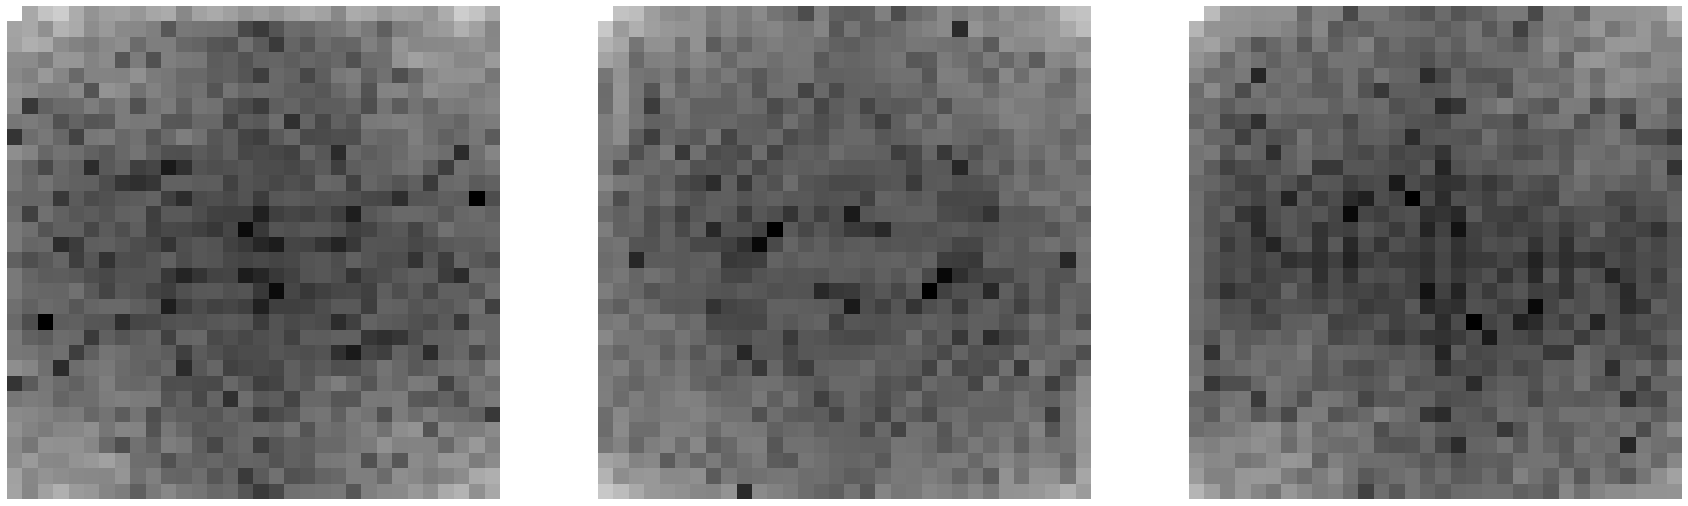

In [201]:
def logTransformation(img: np.ndarray) -> np.ndarray:
    return np.log(1 + img)


LogTransformImages = map(lambda img: logTransformation(np.abs(DFT(img))), images)
LogTransformImagesFSCS = map(
    lambda img: logTransformation(FSCS(np.abs(DFT(img)))), images
)

print("Log Transformation")
printImages(
    list(LogTransformImages),
    (30, 10),
)


Log Transformation + FSCS


(<Figure size 2160x720 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

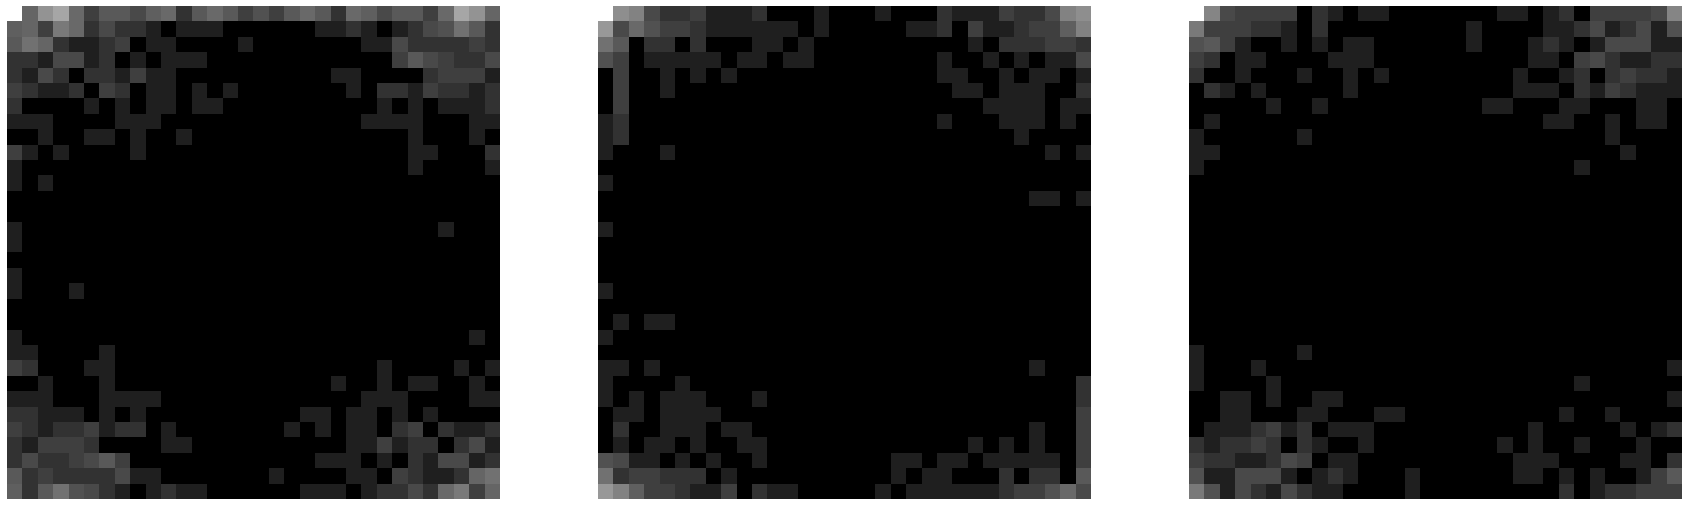

In [202]:
print("Log Transformation + FSCS")
printImages(
    list(LogTransformImagesFSCS),
    (30, 10),
)


### 1.2 Generate DFT using `(-1)^(i+j) I` and display its magnitude


(<Figure size 2160x720 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

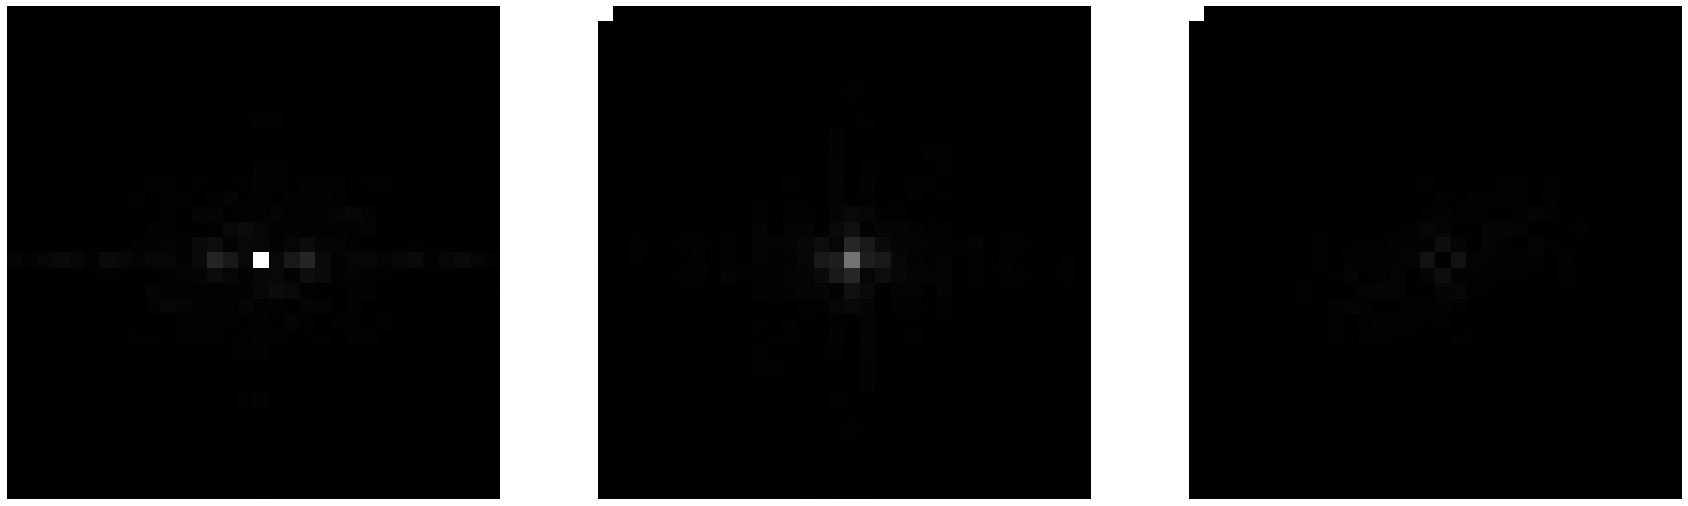

In [203]:
def DFT_centered(img: np.ndarray) -> np.ndarray:
    r = deepcopy(img)
    for (i, row) in enumerate(img):
        for (j, pixel) in enumerate(row):
            r[i][j] = math.pow(-1, i + j) * pixel
    return DFT(r)


printImages(
    list(map(lambda img: np.absolute(DFT_centered(img)), images)),
    (30, 10),
)


### 1.3 Verify that IDFT(DFT(I)) = I


In [204]:
def VerifyIDFTDFT(img: np.ndarray) -> np.ndarray:
    return np.allclose(np.abs(IDFT(DFT(img))), img)


for (i, img) in enumerate(images):
    print(VerifyIDFTDFT(img))


True
True
True


Above, we can see that IDFT(DFT(I)) = I for all the images


### 1.4 Show the importance of phase by transposing the phase matrix and then synthesizing the image. Repeat by

### a) setting the phase to 0

### b) by adding noise.


- 1.4.1 Transpose the phase matrix


(<Figure size 2160x720 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

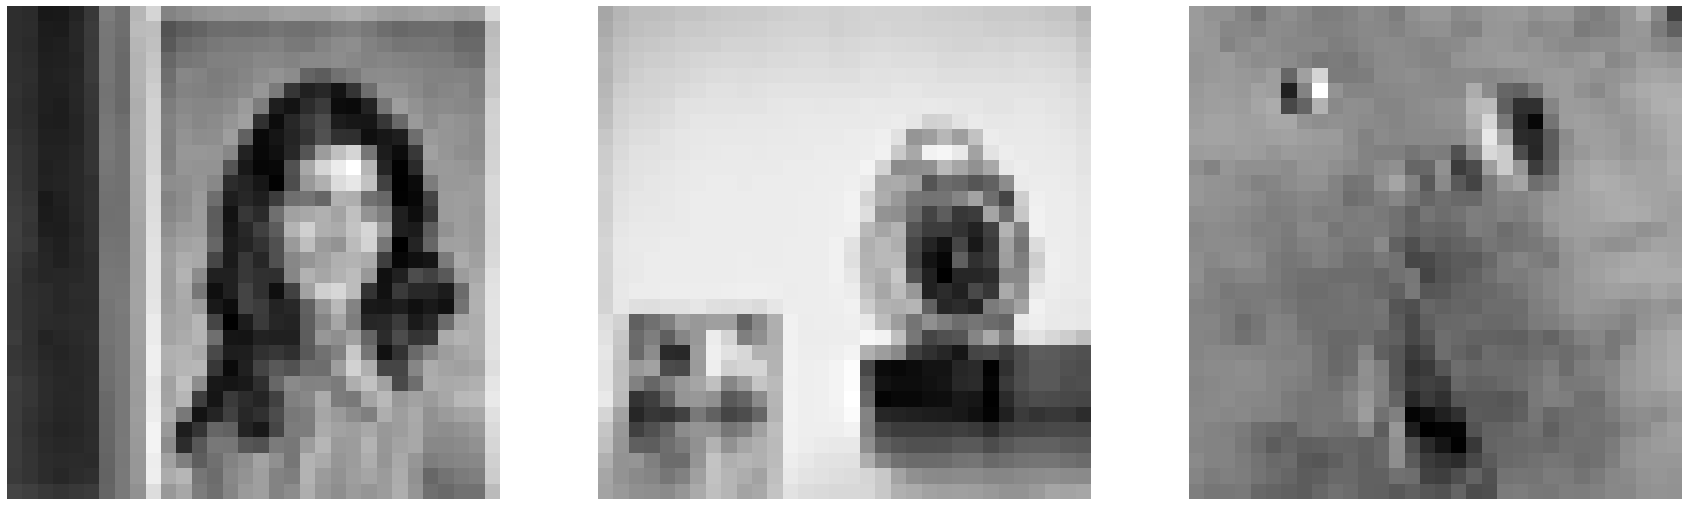

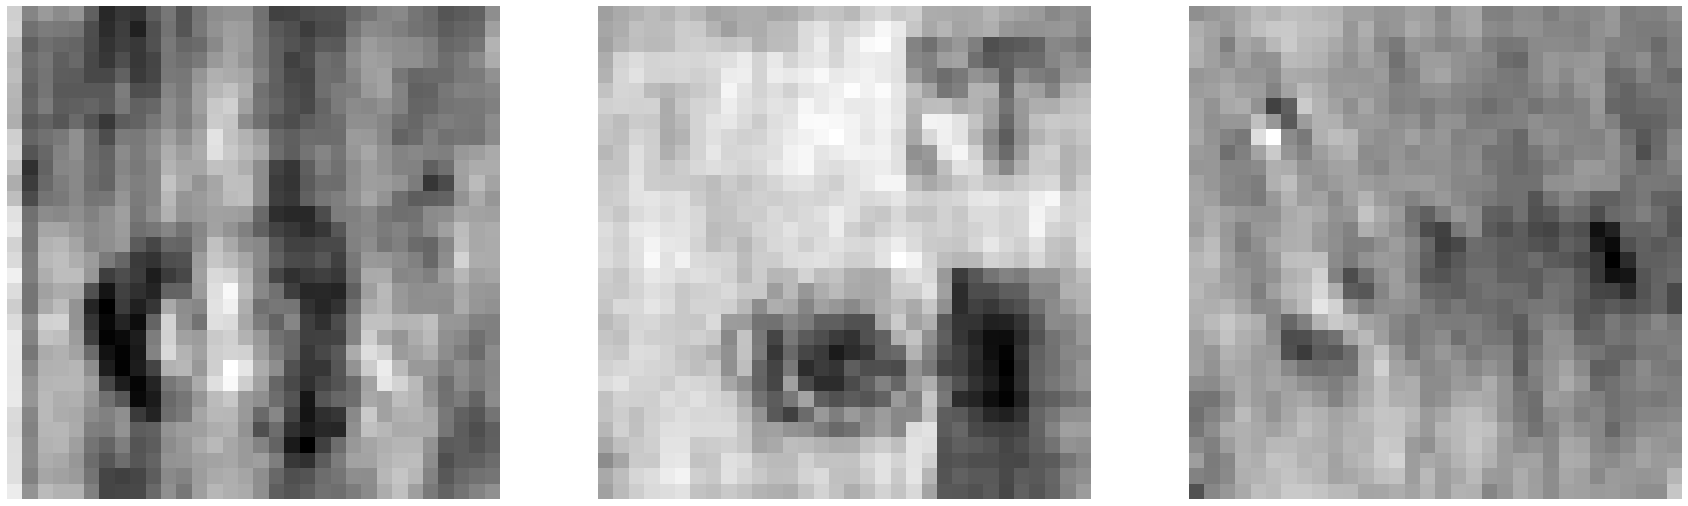

In [217]:
def ModifyImagePhaseTranspose(img: np.ndarray) -> np.ndarray:
    imgDFT = DFT(img)
    DFT_magnitude = np.absolute(imgDFT)
    TransposedPhaseMatrix = np.transpose(np.angle(imgDFT))
    return DFT_magnitude * np.exp(1j * TransposedPhaseMatrix)


printImages(
    list(map(lambda img: img, images)),
    (30, 10),
)
printImages(
    list(map(lambda img: np.abs(IDFT(ModifyImagePhaseTranspose(img))), images)),
    (30, 10),
)


- 1.4.2 Setting the phase to 0


(<Figure size 2160x720 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

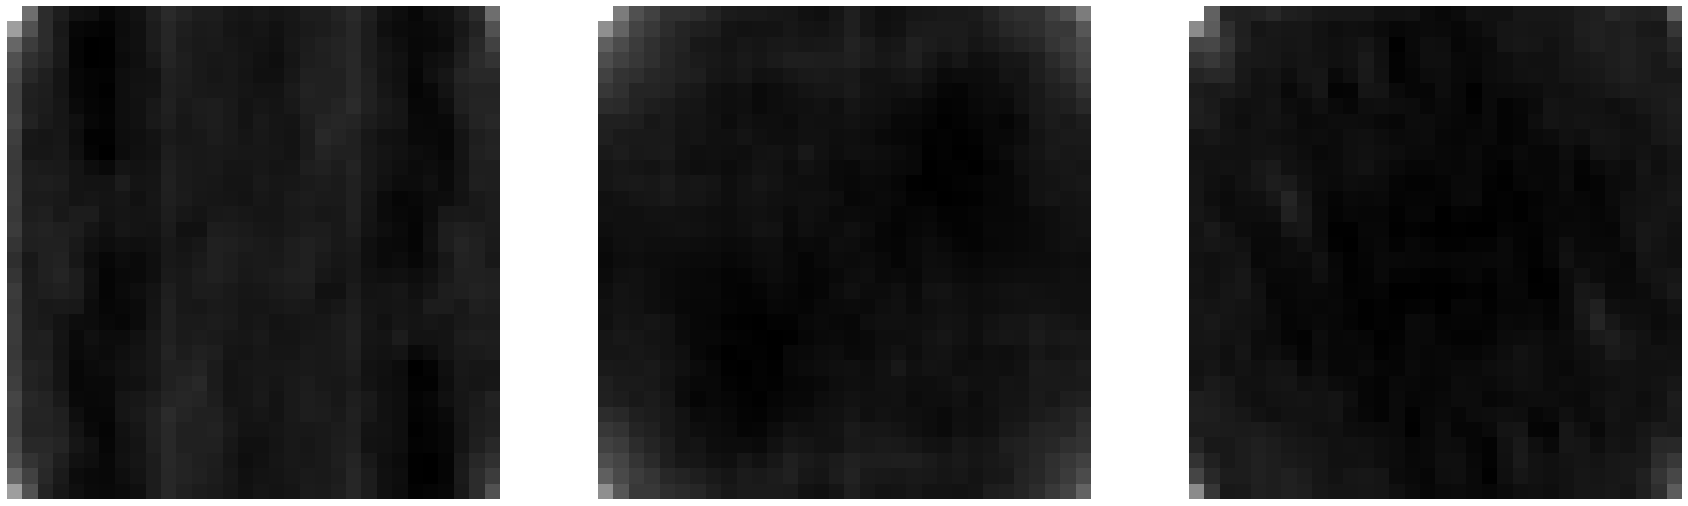

In [206]:
def SettingPhaseToZero(img: np.ndarray) -> np.ndarray:
    imgDFT = DFT(img)
    DFT_magnitude = np.absolute(imgDFT)
    return DFT_magnitude * np.exp(0)


printImages(
    list(map(lambda img: np.abs(IDFT(SettingPhaseToZero(img))), images)),
    (30, 10),
)


- 1.4.3 Adding noise


(<Figure size 2160x720 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

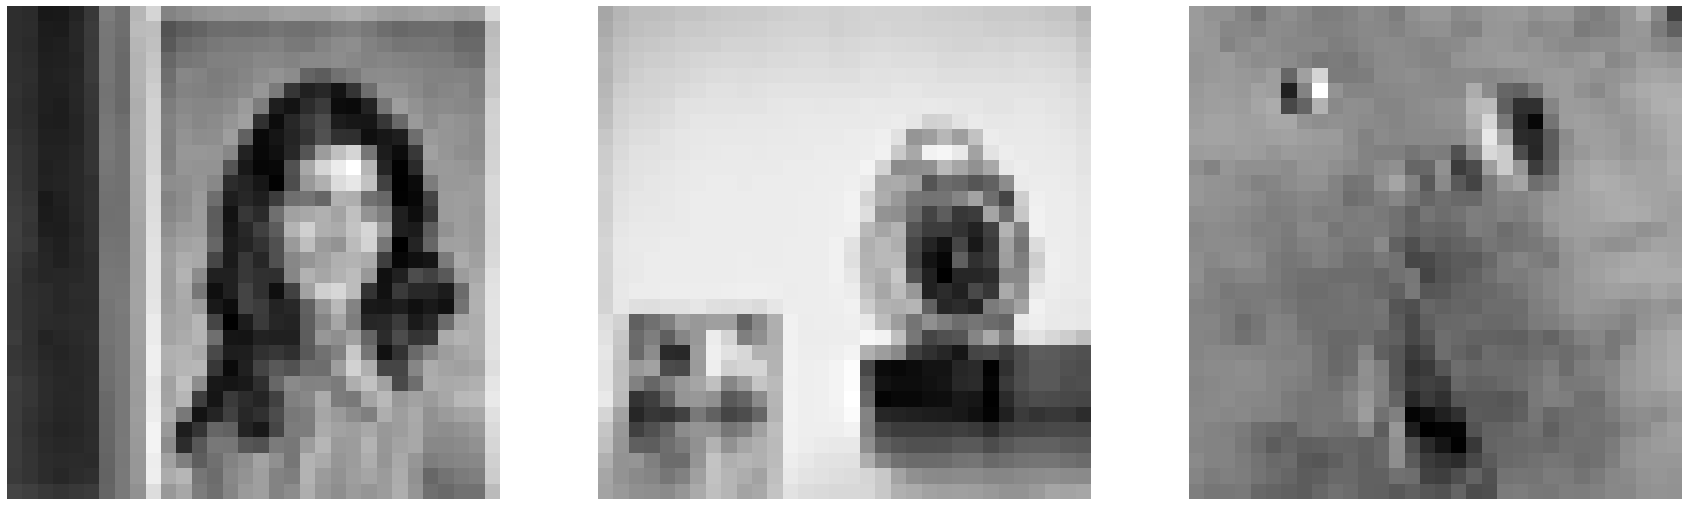

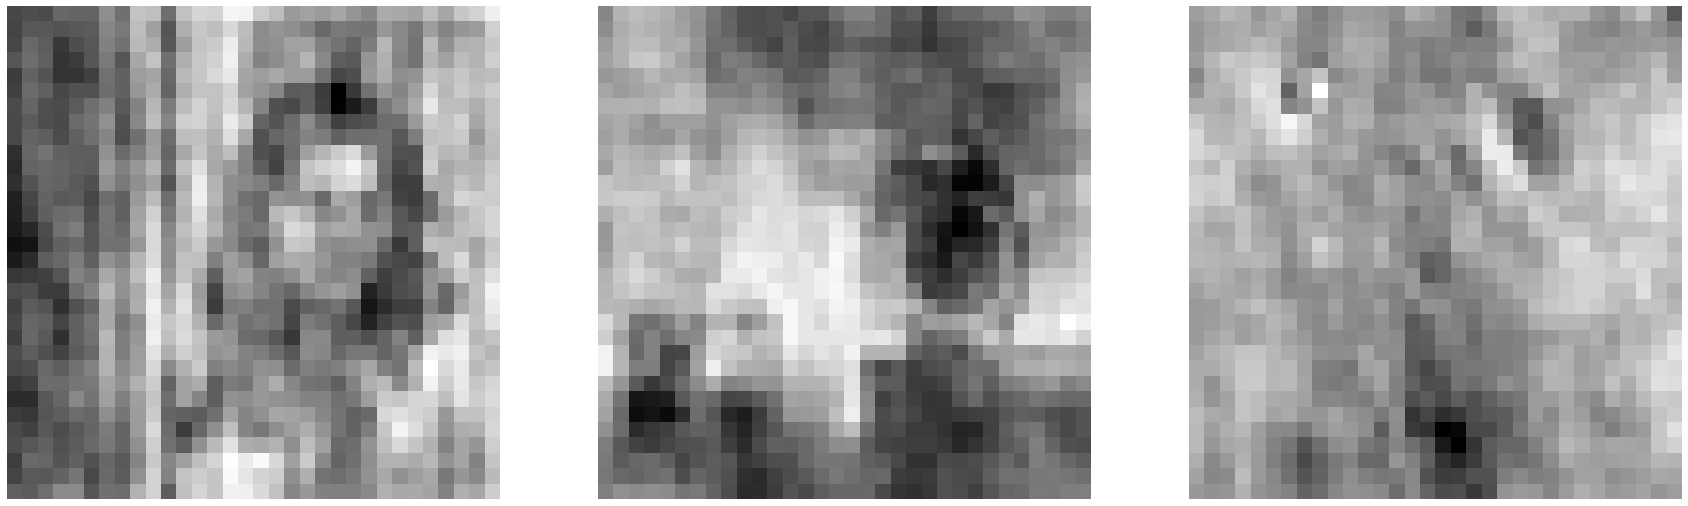

In [219]:
def AddNoiseToImgPhase(img: np.ndarray) -> np.ndarray:
    imgDFT = DFT(img)
    DFT_magnitude = np.absolute(imgDFT)
    DFT_phase = np.angle(imgDFT)
    DFT_phase += np.random.normal(0, 1, DFT_phase.shape)
    return DFT_magnitude * np.exp(1j * DFT_phase)


printImages(
    list(map(lambda img: img, images)),
    (30, 10),
)
printImages(
    list(map(lambda img: np.abs(IDFT(AddNoiseToImgPhase(img))), images)),
    (30, 10),
)


Above, we can see that some of the features remain even after adding noise to the phase matrix


In [208]:
def DFT(img: np.ndarray) -> np.ndarray:
    return np.fft.fft2(img)


def IDFT(img: np.ndarray) -> np.ndarray:
    return np.fft.ifft2(img)


## 2. Peroidic Convolution


### 2.1 Circulary convolve two images. Test your program by using an image and an averaging filter of size 5 × 5.


(<Figure size 2160x720 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

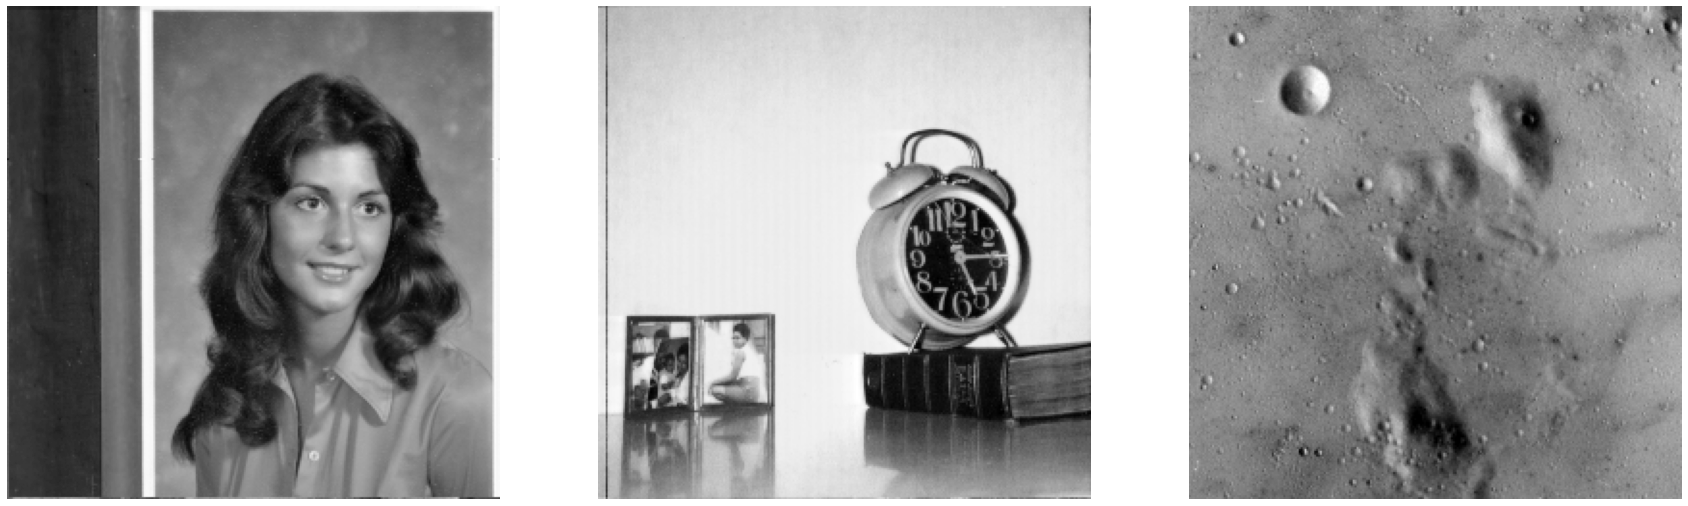

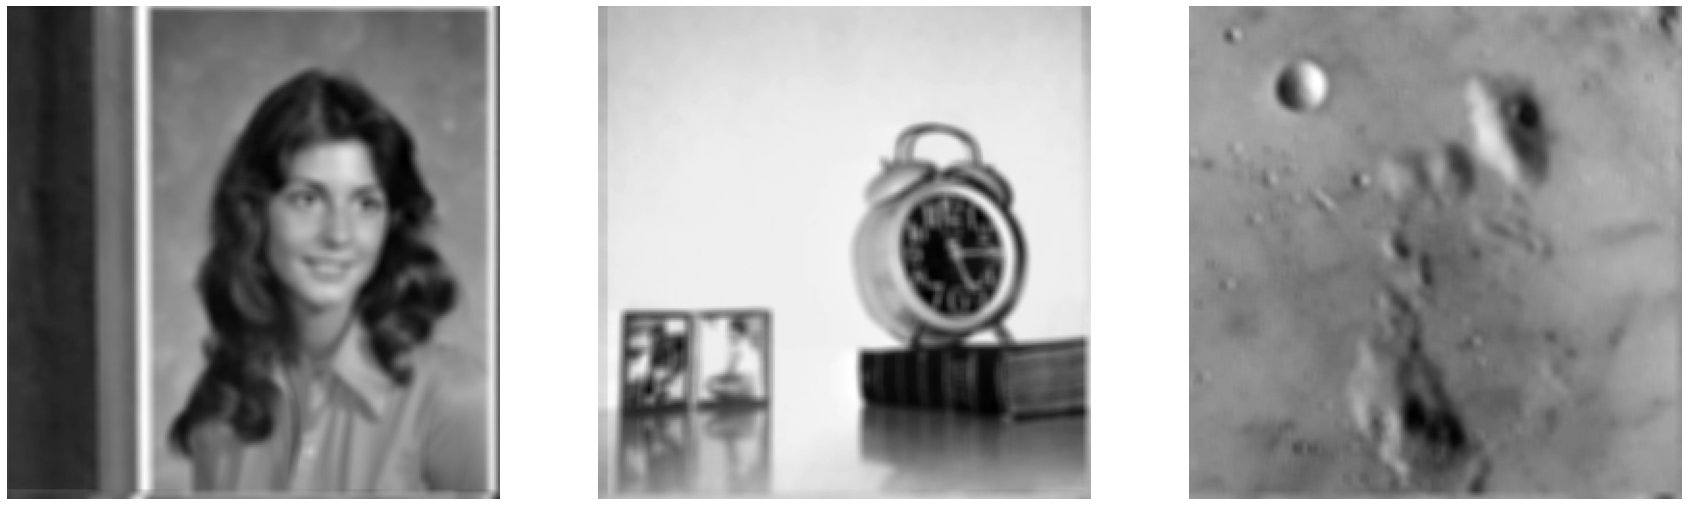

In [209]:
def CircularConvolution(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    N, M = img.shape
    K, L = kernel.shape
    for i in range(N):
        for j in range(M):
            newVal = 0
            for k in range(K):
                for l in range(L):
                    newVal += img[(i + k) % N][(j + l) % M] * kernel[k][l]
            img[i][j] = newVal
    return img


kernel = np.full(shape=(5, 5), fill_value=1 / (5 ** 2))

printImages(
    list(map(lambda img: img, images_full)),
    (30, 10),
)
printImages(
    list(map(lambda img: CircularConvolution(img, kernel), images_full)),
    (30, 10),
)


### 2.2 Linearly convolve the same image and filter using the circular convolution function above after appropriate zero padding.


(<Figure size 2160x720 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

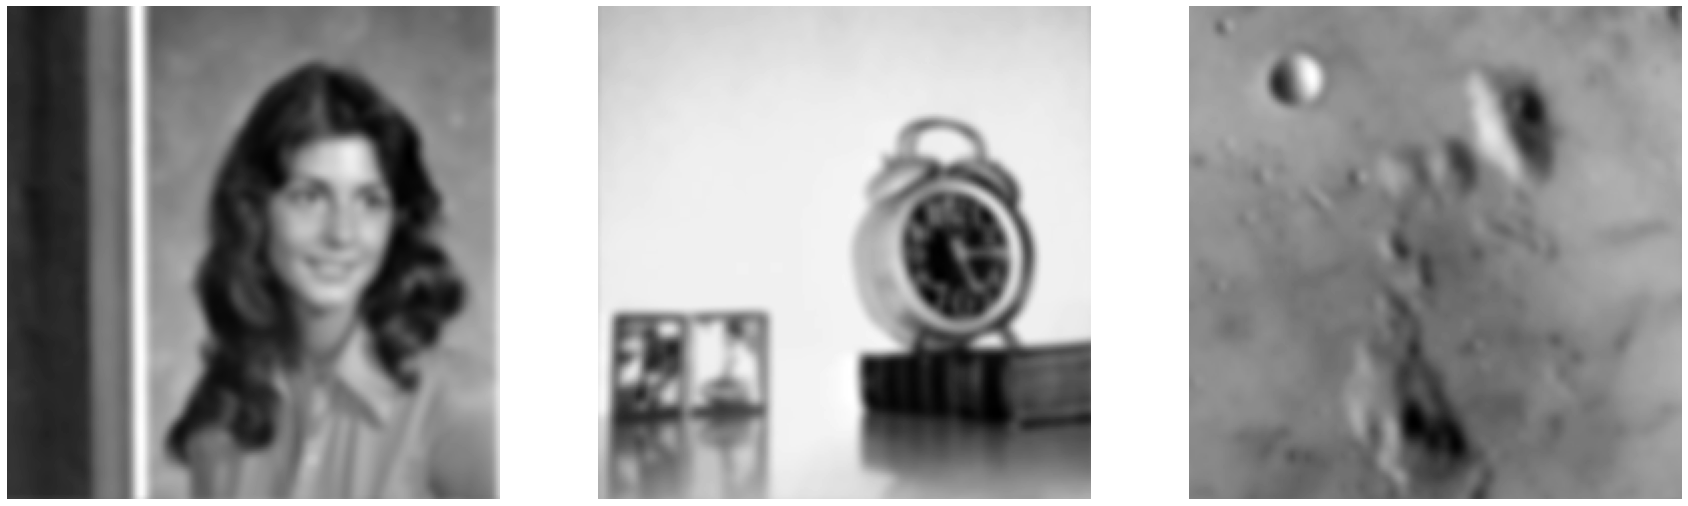

In [210]:
def AddPaddingToImg(img: np.ndarray, padding: int = 5) -> np.ndarray:
    return np.pad(
        img, pad_width=((padding, padding), (padding, padding)), mode="constant"
    )


def LinearConvolution(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    r = CircularConvolution(img, kernel)
    return r[3 : r.shape[0] - 7, 3 : r.shape[1] - 7]


printImages(
    list(map(lambda img: LinearConvolution(img, kernel), images_full)),
    (30, 10),
)


### 2.3 Now, verify that you can perform linear covolution using the DFT of zero padded images.


(<Figure size 2160x720 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

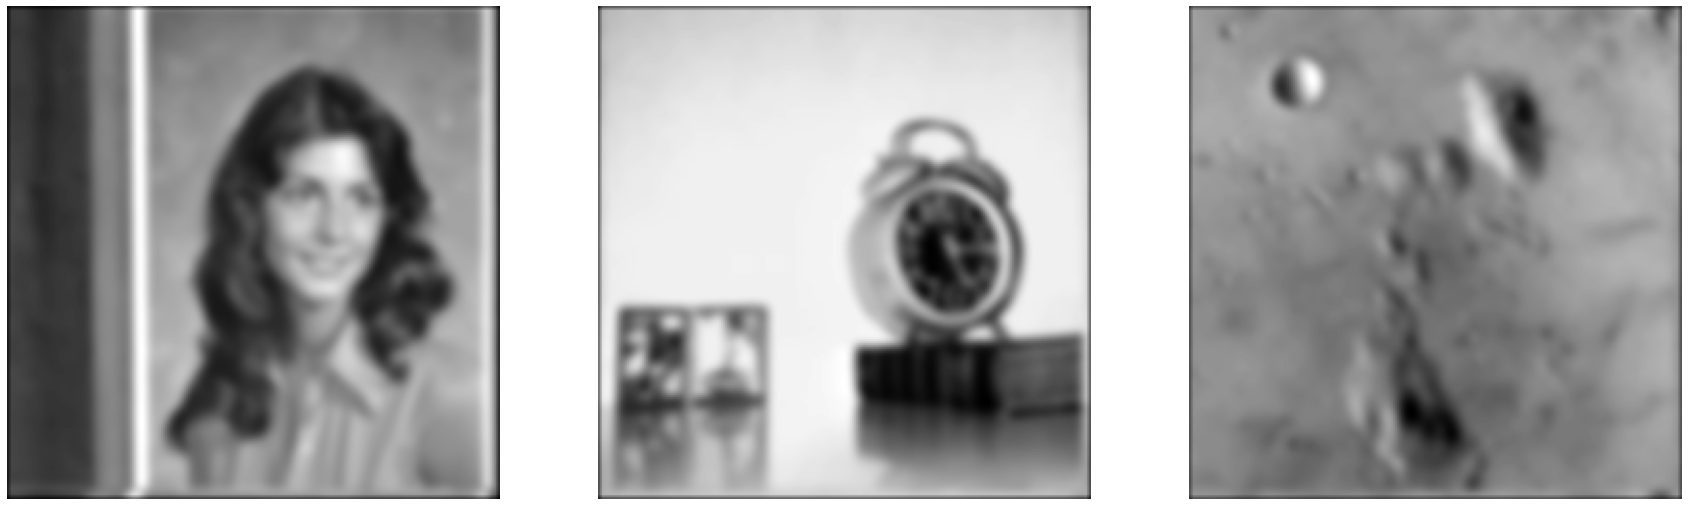

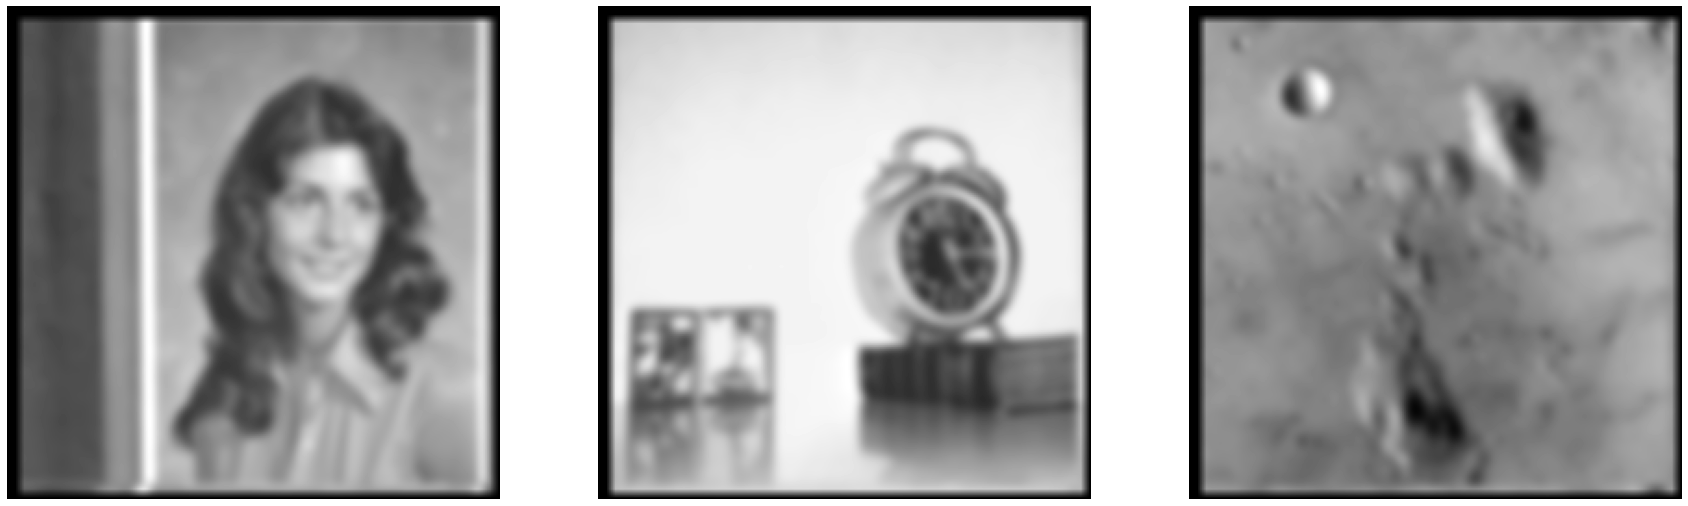

In [211]:
def CircularConvolutionDFT(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    imgDFT = DFT(img)
    kernelDFT = DFT(kernel)
    return IDFT(imgDFT * kernelDFT)


def LinearConvolutionDFT(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    r = CircularConvolutionDFT(img, kernel)
    return r


def createKernel(size: int, totalSize: int) -> np.ndarray:
    kernel = np.zeros(shape=(totalSize, totalSize))

    for i in range(size):
        for j in range(size):
            kernel[i][j] = 1 / size ** 2

    return kernel


printImages(
    list(
        map(
            lambda img: LinearConvolution(AddPaddingToImg(img), createKernel(5, 5)),
            images_full,
        )
    ),
    (30, 10),
)

printImages(
    list(
        map(
            lambda img: np.abs(
                LinearConvolutionDFT(
                    AddPaddingToImg(img),
                    createKernel(5, 256 + 5 + 5),
                )
            ),
            images_full,
        )
    ),
    (30, 10),
)


Hence, we can perform linear convolution using the DFT of zero padded images.


## 3. Image Denoising using Linear Filters


In [212]:
def AddGaussianNoise(img: np.ndarray, sigma: float = 25) -> np.ndarray:
    noise = np.random.normal(0, sigma, img.shape)
    return img + noise


### 3.1 Average filter of size M × M. Vary M from 3 to 15 in increments of 2 and observe the tradeoff between denoising and smoothing. What could be an appropriate window size for this noise level?


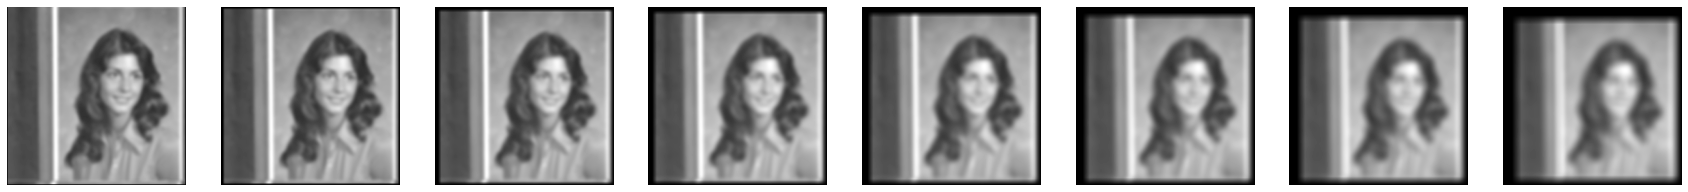

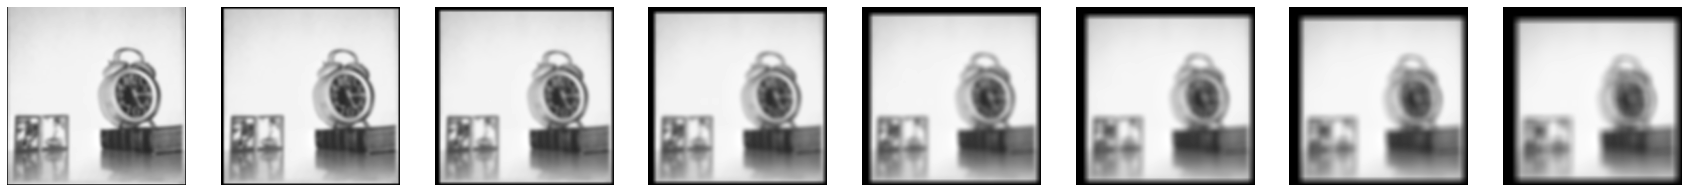

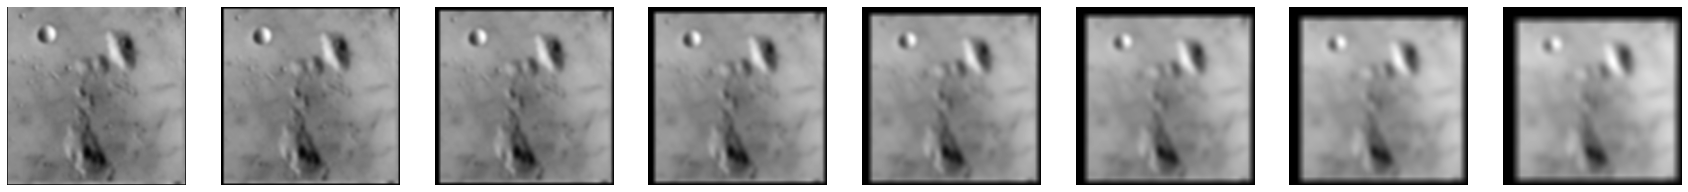

In [213]:
def DenoiseImage(noisyImg: np.ndarray, kernelSize: int) -> np.ndarray:
    return LinearConvolutionDFT(
        AddPaddingToImg(noisyImg, kernelSize),
        createKernel(kernelSize, 256 + kernelSize + kernelSize),
    )


def TryDifferentFilters(kernelSizes: list[np.ndarray], img: np.ndarray) -> np.ndarray:
    return list(map(lambda kernelSize: DenoiseImage(img, kernelSize), kernelSizes))


kernelSizes = [1, 3, 5, 7, 9, 11, 13, 15]

for (_, img) in enumerate(images_full):
    printImages(
        list(
            map(
                lambda i: np.abs(i),
                TryDifferentFilters(kernelSizes, img),
            )
        ),
        (30, 5),
    )


From above, as the filter size increases, the noise level decreases and the image becomes softer. In my opinion the window size should be around 3x3 for a good blend of smoothing and denoising even though any kind of denoising will be a loss of information and sharpness.


### 3.2 Gaussian filter of size 5 × 5. Experiment with the standard deviation σh of the filter from 0.5 to 5 in steps of 0.5 and observe its effect on denoising.


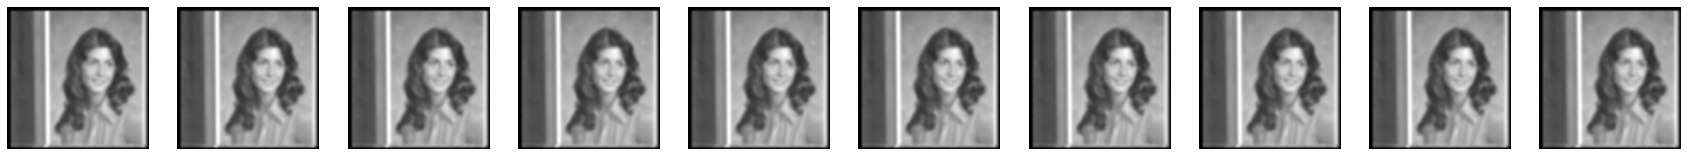

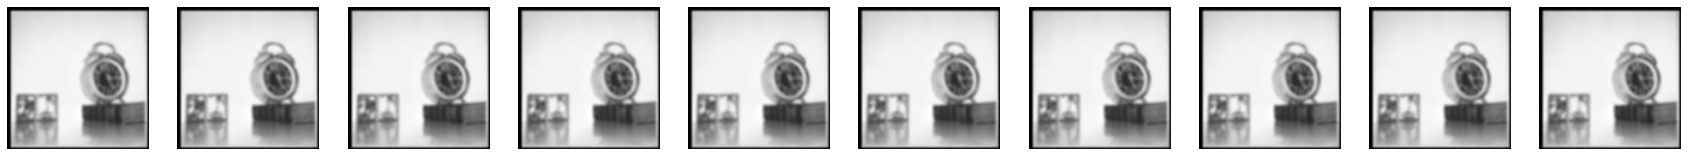

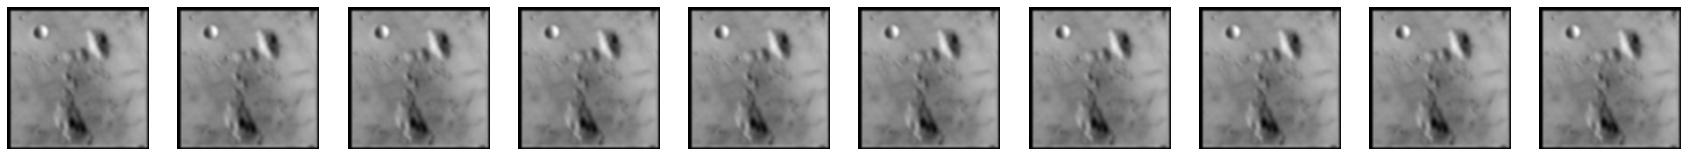

In [214]:
def createGaussianFilter(sigma=1, shape=(5, 5), totalSize=256 + 10):
    m, n = [(ss - 1.0) / 2.0 for ss in shape]
    y, x = np.ogrid[-m : m + 1, -n : n + 1]
    h = np.exp(-(x * x + y * y) / (2.0 * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h


def DenoiseImage(noisyImg: np.ndarray, filter: np.ndarray) -> np.ndarray:
    padding = filter.shape[0]
    return LinearConvolutionDFT(
        AddPaddingToImg(noisyImg, padding),
        createKernel(padding, 256 + padding + padding),
    )


sigmas = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

for (_, img) in enumerate(images_full):
    printImages(
        list(
            map(
                lambda i: np.abs(i),
                list(
                    map(
                        lambda sigma: DenoiseImage(img, createGaussianFilter(sigma)),
                        sigmas,
                    )
                ),
            )
        ),
        (30, 5),
    )


From above, honestly, I cannot see the difference in the pictures.
